In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [4]:
df = df._get_numeric_data()

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
# bibliotecas para plotagem
from ipywidgets import interact, interactive, fixed, interact_manual

In [7]:
# Funções de plotagem
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(RedFunction, hist=False, color='r', label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color='b', label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel("Preço (em dolar)")
    plt.ylabel("Proporção de carros")
    
    plt.show()
    plt.close()

In [50]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [9]:
# Treinando e testando
y_data = df['price']

In [10]:
# Drop dado price em x_data
x_data = df.drop('price', axis=1)

In [11]:
# Separa randomicamente os dados em teste e treino
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.01, random_state=1)

print("Número de amostras de teste:", x_test.shape[0])
print("Número de amostras de treino:", x_train.shape[0])

Número de amostras de teste: 3
Número de amostras de treino: 198


In [14]:
# Questão 1: Use a função "train_test_split" para separa o dataset aonde 40% dos dados serão utilizados para teste.
# Coloque o parametro "random_state" igual a zero. A saida da função deve ser a seguinte: "x_train1", "x_test1", "y_train1"
# e "y_test1"
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lre=LinearRegression()

In [17]:
lre.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [18]:
# Calcula o R^2 dos dados de teste
lre.score(x_test[['horsepower']], y_test)

0.17948915722994152

In [19]:
lre.score(x_train[['horsepower']], y_train)

0.6540389243438325

In [20]:
# Questão 2: Encontre o R^2 nos dados de teste usando o dataset de 40%
lre.fit(x_train1[['horsepower']], y_train1)

LinearRegression()

In [21]:
lre.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

In [22]:
lre.score(x_train1[['horsepower']], y_train1)

0.5754067463583004

In [23]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

In [24]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [25]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [26]:
print("A média dos folds são", Rcross.mean(), "e o desvio padrão é", Rcross.std())

A média dos folds são 0.522009915042119 e o desvio padrão é 0.29118394447560286


In [27]:
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4,scoring="neg_mean_squared_error")

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.7224759 ])

In [29]:
# Questão 3: Calcule a média R^2 usando dois folds, e a média de R^2 para o segundo fold usando a variável "horsepower"
Rc=cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rc.mean()

0.5166761697127429

In [30]:
from sklearn.model_selection import cross_val_predict

In [31]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [32]:
# Overfitting, Underfitting e Model Selection
lr = LinearRegression()

In [33]:
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [34]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 6528.85728172, 15408.4165004 ,  5999.9813643 , 18777.90494553,
       10976.90199325])

In [35]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11243.47323871,  5814.46707799, 11147.71216919])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

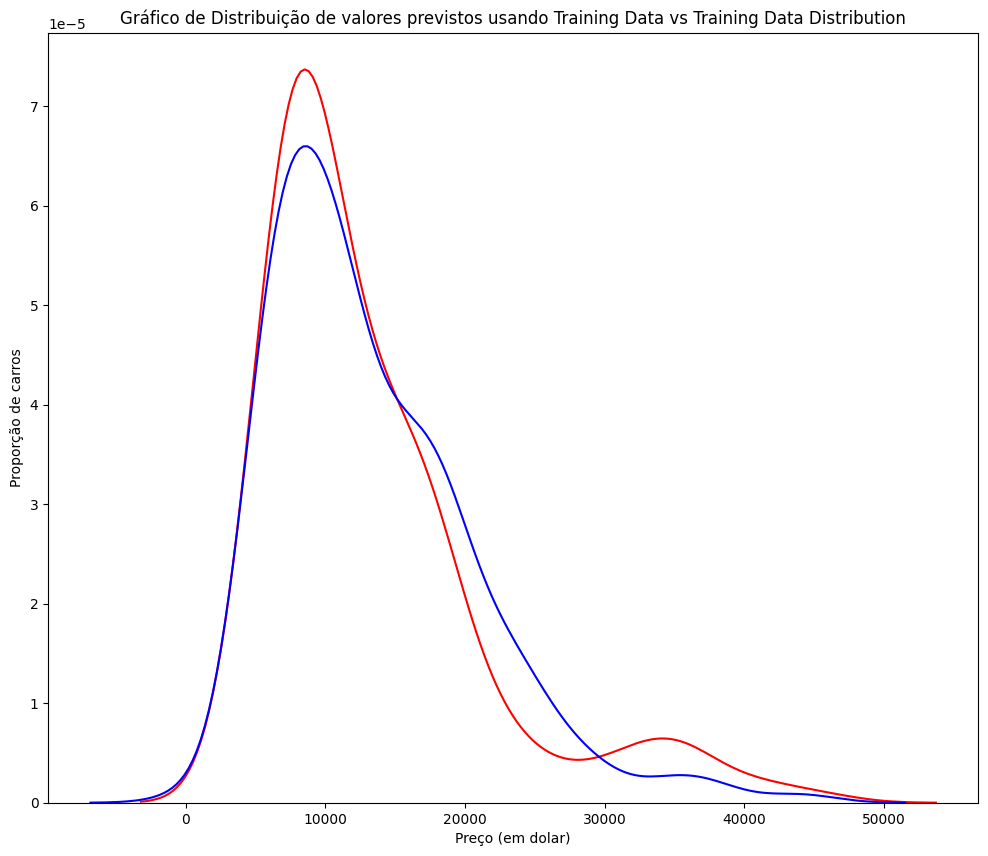

In [39]:
Title = "Gráfico de Distribuição de valores previstos usando Training Data vs Training Data Distribution"
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

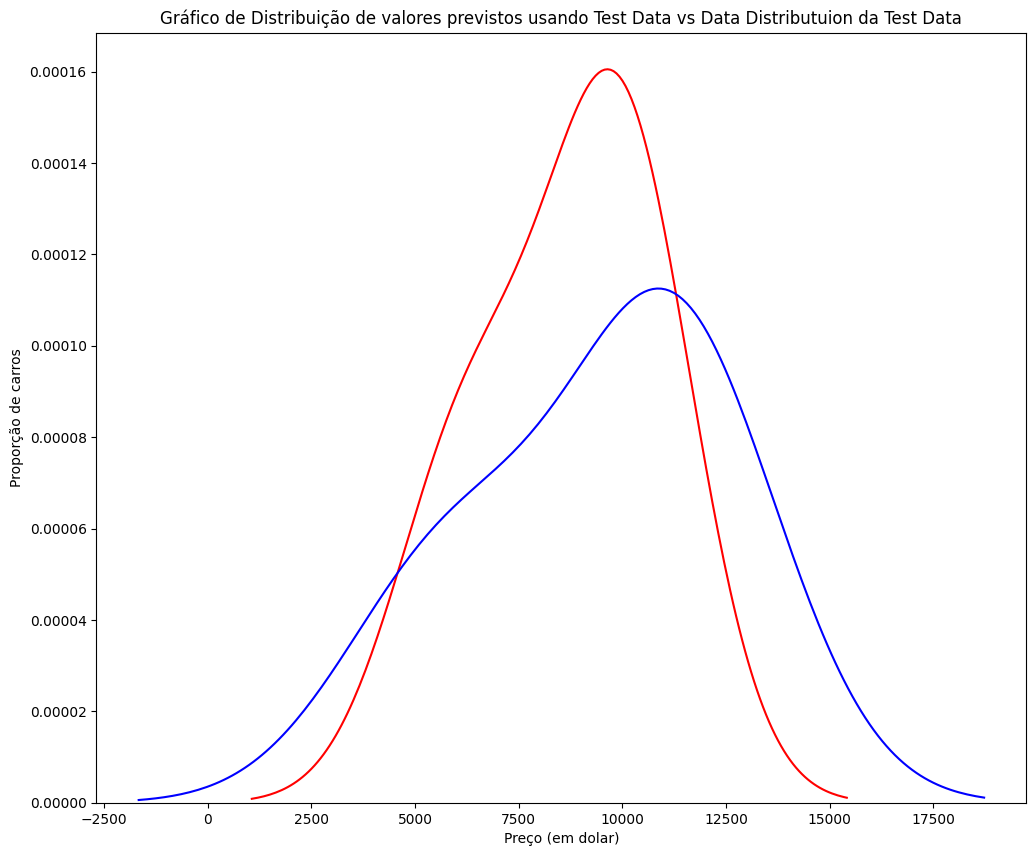

In [40]:
Title='Gráfico de Distribuição de valores previstos usando Test Data vs Data Distributuion da Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
# Overfitting
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [43]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [44]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [45]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.63658259,  7307.96945632, 12213.77686795, 18893.28704901,
       19995.99382148])

In [47]:
print("Valores previstos:", yhat[0:4])
print("Valores reais:", y_test[0:4].values)

Valores previstos: [ 6728.63658259  7307.96945632 12213.77686795 18893.28704901]
Valores reais: [ 6295. 10698. 13860. 13499.]


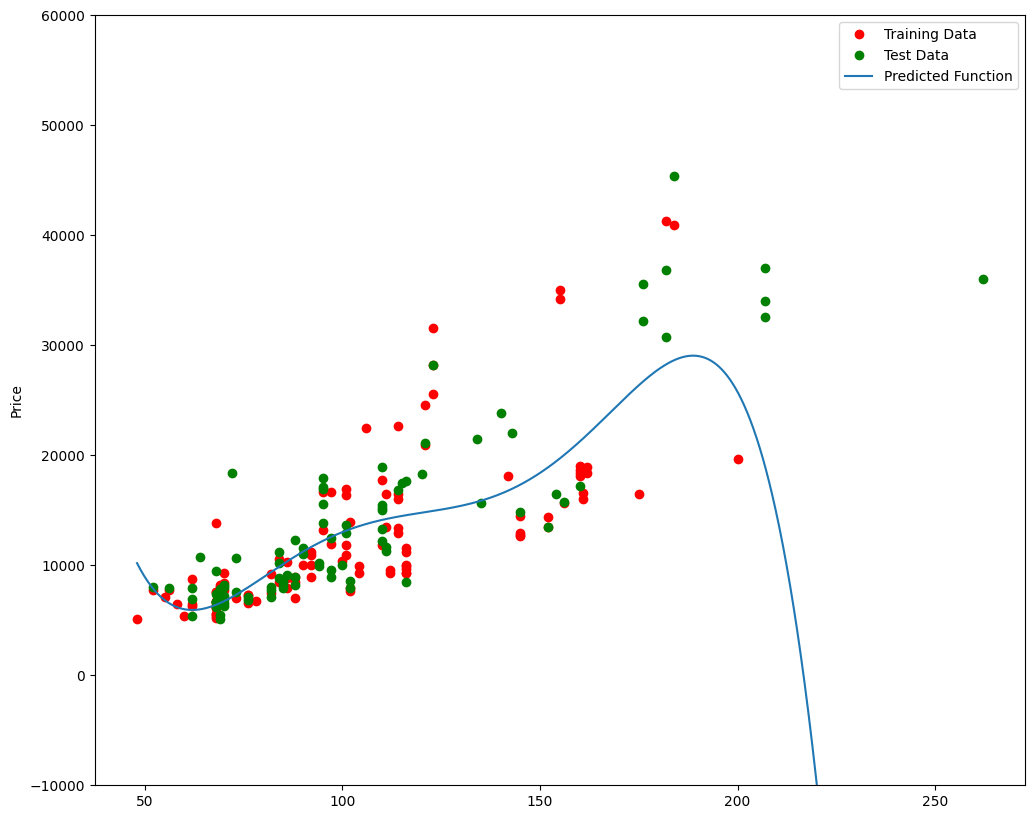

In [51]:
# Pingos vermelhos representam os dados de treino
#Pingos verdes representam os dados de teste
# A linha azul representa a predição do modelo
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [52]:
poly.score(x_train_pr, y_train)

0.5567716901586083

In [53]:
# Um R^2 negativo é sinal de Overfitting
poly.score(x_test_pr, y_test)

-29.8712974437509

Text(3, 0.75, 'Max R^2 ')

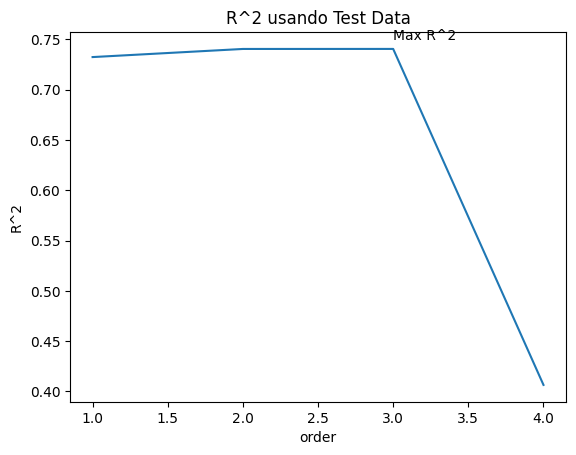

In [57]:
Rsqu_test=[]

order=[1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 usando Test Data')
plt.text(3, 0.75, 'Max R^2 ')   

In [58]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [59]:
# Experimentação interativa com diferentes ordens polinomiais e diferentes tamanhos de dados
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [60]:
# Questão 4: a) Cria uma "PolynomialFeatures" de degree dois.

pr1 = PolynomialFeatures(degree=2)

In [62]:
# Questão 4: b) Transforme as amostras de treino e teste das variáveis 'horsepower', 'curb-weight', 'engine-size'
# e 'highway-mpg'. Dica: Use o método 'fit_transform'

x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [63]:
# Questão 4: c)Quantas dimensões diferentes a nova feature tem? 
# Dica: Use o atributo "shape"

x_train_pr1.shape

(110, 15)

In [65]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

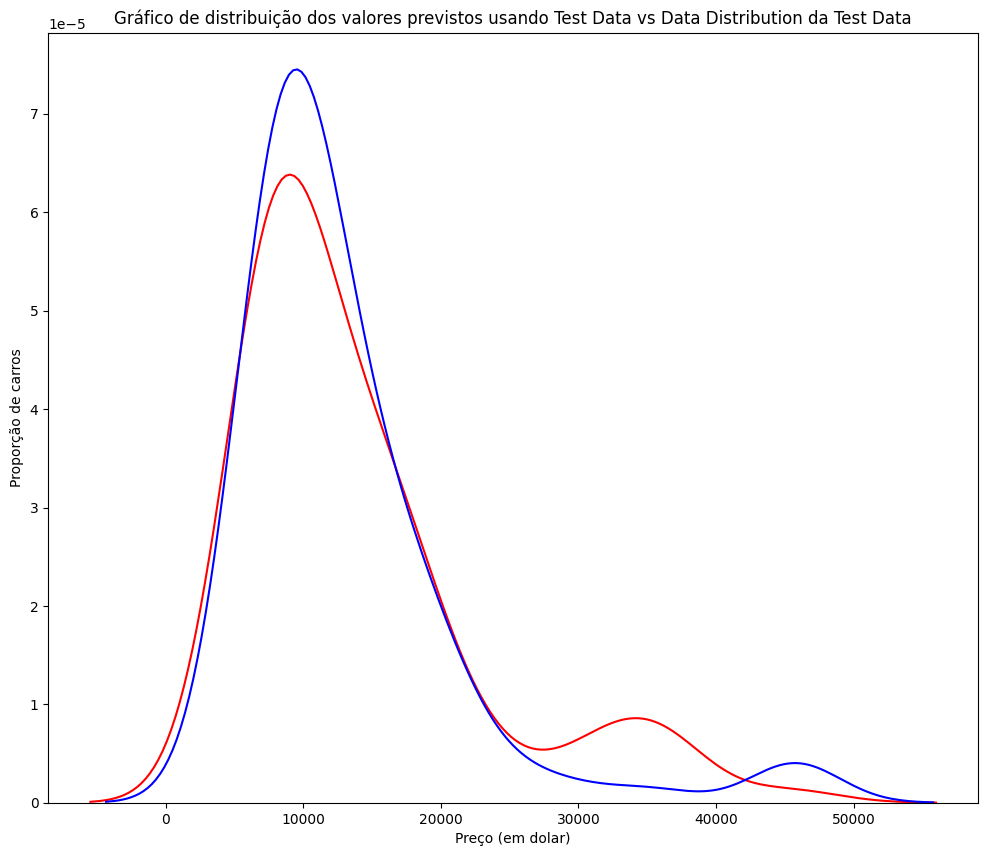

In [66]:
# Questão 4: d) Use o método "predict" para predizer a saida polinomial, depois use a função "DistributionPlot"
# para mostrar a distribuição do teste previsto vs os dados reais

yhat_test1= poly1.predict(x_test_pr1)

Title='Gráfico de distribuição dos valores previstos usando Test Data vs Data Distribution da Test Data'

DistributionPlot(y_test, yhat_test1, "Valores reais (Test)", "Valores previstos (Test)", Title)

#### Questão 4: e) Usando o gráfico de distribuição acima, descreva (em palavras) as duas regiões aonde o valor
#### previsto é menos preciso do que os preços reais.
O valor é menos preciso do que os atuais no range de $10,000, aonde o preço é bem maior do que o atual. Ao mesmo tempo que, o preço previsto acaba sendo menor do que o atual no range entre 30,000 a 40,000. 

In [67]:
# Ridge Regression
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [68]:
from sklearn.linear_model import Ridge

In [69]:
RidgeModel=Ridge(alpha=1)

In [70]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [71]:
yhat=RidgeModel.predict(x_test_pr)

In [72]:
print('Previsto:', yhat[0:4])
print('test set :', y_test[0:4].values)

Previsto: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [73]:
# Temos que selecionar o valor de alpha que mais minimiza o erro de teste.
from tqdm import tqdm
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score":test_score, "Train Score":train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 390.83it/s, Test Score=0.564, Train Score=0.859]


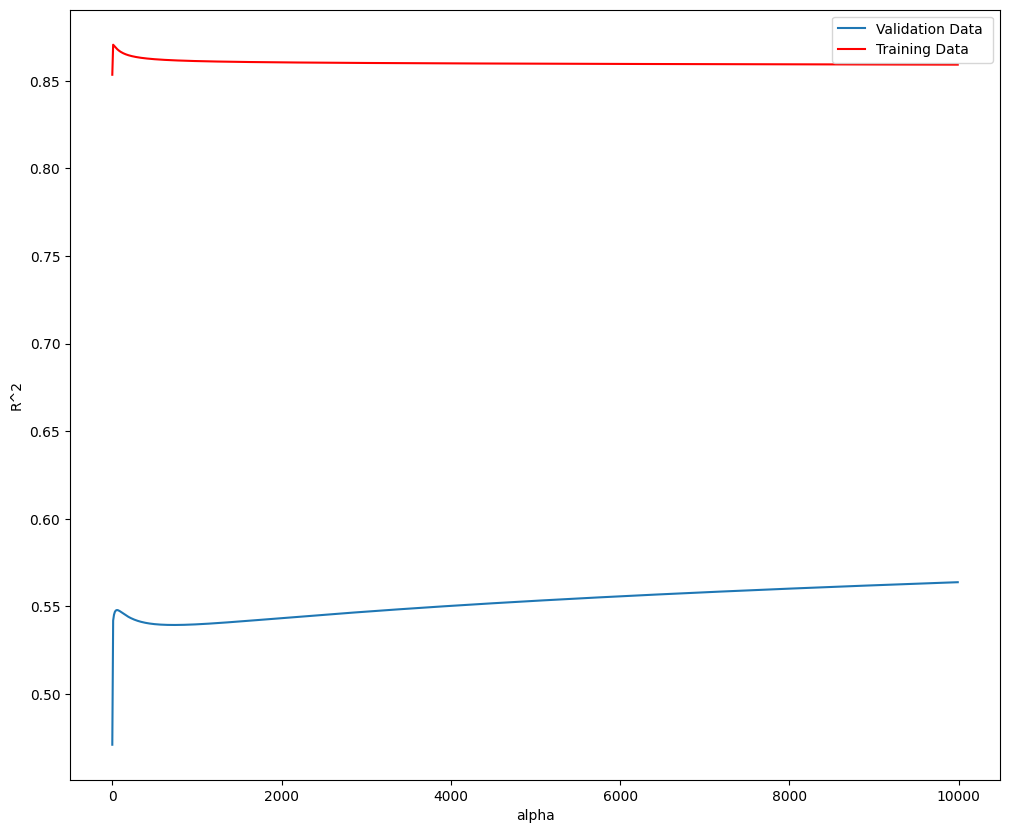

In [74]:
# Plotando o valor de R^2 em diferentes alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label='Validation Data ')
plt.plot(Alpha, Rsqu_train, 'r', label='Training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [75]:
# Questão 5: Faça uma Ridge Regression. Calcule o R^2 usando polynomial features, use training data para treinar o modelo e
# use test data para testar o modelo. O parametro de alpha deve ser 10.

RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206205

In [76]:
# Grid Search
from sklearn.model_selection import GridSearchCV

In [77]:
# Dicionário de valores de parâmetro
parameters1 = [{'alpha':[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [78]:
RR = Ridge()
RR

Ridge()

In [82]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [83]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [84]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [85]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151